In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
#import stheno.torch as stheno

# from convcnp.experiment import report_loss, RunningAverage
# from convcnp.utils import gaussian_logpdf, init_sequential_weights, to_multiple
# from convcnp.architectures import SimpleConv, UNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def to_numpy(x):
    """Convert a PyTorch tensor to NumPy."""
    return x.squeeze().detach().cpu().numpy()

In [2]:
#import mogptk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:

import time 
import random
random_seed = 1111
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
figsiz_=(11,2.5*2)
fontsiz = 18


plt.rc('figure', figsize=figsiz_,dpi=100)
plt.rcParams['figure.figsize'] = figsiz_
plt.rc('font', family='serif', size=fontsiz)

## dataset = AirQualityUCI.csv

In [5]:
from collections import OrderedDict
import mogptk


df = pd.read_csv('data/AirQualityUCI.csv', delimiter=';') #03/10
#df['Date'],

# Replace missing values with NaN
df.replace(-200.0, np.nan, inplace=True)
df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
# start_stamp = '2005-03-1 00:00:00.0'
# end_stamp = '2005-03-31 00:00:00.0'

start_stamp = '2005-01-1 00:00:00.0'
starts =  pd.to_datetime('01/01/2005 00.00.00', format='%d/%m/%Y %H.%M.%S')
end_stamp = '2005-03-1 00:00:00.0'

#midday=21



#df['Date'] < pd.Timestamp(end_stamp) and 
ini_date = pd.Timestamp(start_stamp)
df1 = df[df['Date'] > pd.Timestamp(start_stamp)]
df2 = df1[df1['Date'] <= pd.Timestamp(end_stamp)]
df2['n_time'] = (df2['Date'] - ini_date) / pd.Timedelta(hours=1)


#cols = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
#cols = ['CO(GT)', 'T', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
cols = ['CO(GT)', 'T', 'NOx(GT)', 'NO2(GT)']
num_channels = len(cols)
#dataset = mogptk.LoadDataFrame(df2, x_col='n_time', y_col=cols)
#dataset = mogptk.LoadDataFrame(df2, x_col='Date', y_col=cols)
#num_channels = len(cols)

/home/becre1776/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,n_time
7111,2005-01-01 01:00:00,01.00.00,1.6,1275.0,NaN,8.8,930.0,215.0,649.0,106.0,1024.0,1617.0,5.3,50.7,0.4564,NaN,NaN,1.0
7112,2005-01-01 02:00:00,02.00.00,2.5,1173.0,NaN,7.5,878.0,300.0,738.0,129.0,1002.0,1355.0,5.9,50.0,0.4689,NaN,NaN,2.0
7113,2005-01-01 03:00:00,03.00.00,2.7,1163.0,NaN,7.6,881.0,NaN,748.0,NaN,1001.0,1296.0,4.9,53.9,0.4693,NaN,NaN,3.0
7114,2005-01-01 04:00:00,04.00.00,1.9,1054.0,NaN,5.6,791.0,253.0,830.0,126.0,967.0,1131.0,4.3,55.3,0.4650,NaN,NaN,4.0
7115,2005-01-01 05:00:00,05.00.00,1.4,1004.0,NaN,4.8,753.0,181.0,879.0,106.0,942.0,1036.0,4.2,57.1,0.4759,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,2005-02-28 20:00:00,20.00.00,2.5,939.0,NaN,7.4,872.0,297.0,814.0,142.0,870.0,793.0,1.4,38.0,0.2615,NaN,NaN,1412.0
8523,2005-02-28 21:00:00,21.00.00,1.6,827.0,NaN,3.6,687.0,225.0,1015.0,123.0,727.0,573.0,1.0,36.6,0.2456,NaN,NaN,1413.0
8524,2005-02-28 22:00:00,22.00.00,0.9,776.0,NaN,1.9,580.0,122.0,1183.0,90.0,655.0,402.0,1.1,35.4,0.2382,NaN,NaN,1414.0
8525,2005-02-28 23:00:00,23.00.00,0.7,755.0,NaN,1.4,538.0,100.0,1285.0,79.0,621.0,343.0,1.0,34.3,0.2292,NaN,NaN,1415.0


In [7]:
dataset_dict = OrderedDict()
dataset_dict['total_day'] = 61
dataset_dict['split_day'] = 31
dataset_dict['duration'] = 3
#dataset_dict['duration'] = 1.5

dataset_dict['unit'] = 24
dataset_dict['unit2'] = 1

In [8]:
#dataset[1]['Date']

In [9]:


#-----------
#descpriont
#-----------

# 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'
# dataset_dict[0] = 
# dataset_dict[1] = 
# dataset_dict[2] =
# dataset_dict[3] = 
# dataset_dict[4] = 

#time_scale = 24
#normalize=False
#normalize=True
# if normalize == True:
#     n_time_split /= time_scale


normalize=True
for ith,ith_col in enumerate(cols):
    #dataset_dict[ith_col] = {}
    dataset_dict[ith] = {}

    #x,y = dataset[ith_col].get_data()        
    #dataset_dict[ith]['x'] = np.array(x,np.float32).squeeze()
    #dataset_dict[ith]['y'] = np.array(y,np.float32).squeeze()
    
    y=df2[ith_col].to_numpy(dtype=np.float32)    
    x=((df2['Date']-starts)/ (1*(pd.Timedelta('1h')))).to_numpy(dtype=np.float32)
    dataset_dict[ith]['x'] = x/dataset_dict['unit'] 
    
    if normalize == True:
        dataset_dict[ith]['ymean'] =np.nanmean(y)
        dataset_dict[ith]['ystd'] = np.nanstd(y)
        dataset_dict[ith]['y'] = (y- dataset_dict[ith]['ymean'])/dataset_dict[ith]['ystd']                
    else:
        dataset_dict[ith]['y'] = y
    
        #n_time_split /= time_scale
    dataset_dict[ith]['x'] = dataset_dict[ith]['x'][~np.isnan(dataset_dict[ith]['y'])]
    dataset_dict[ith]['y'] = dataset_dict[ith]['y'][~np.isnan(dataset_dict[ith]['y'])]
    


In [10]:
#dataset_dict[0]['x']

In [11]:
def nparray2tensor(context_x,context_y,target_x,target_y):
    return torch.tensor(context_x).float(),\
           torch.tensor(context_y).float(),\
           torch.tensor(target_x).float(),\
           torch.tensor(target_y).float()



def prepare_batch_new(dataset_dict , nbatch = 32,batch_npoints=(64,64), intrain = True, forfig = False,num_channels=4):
    context_x,context_y = [],[]
    target_x,target_y = [],[]
    full_x,full_y = [],[]
    
    #n_points = len(x)
    #time_dict_index = get_index(dataset_dict,test_option = test_option,test_len=test_len)
    split_day = dataset_dict['split_day']
    for _ in range(nbatch):

        i_context_x,i_context_y = [],[]
        i_target_x,i_target_y = [],[]
        i_full_x,i_full_y = [],[]
        #for ith_channel in timedict_index:
        
        #dataset_dict[0]
        if intrain and not forfig:
            #chosen_day = np.random.randint(5,dataset_dict['split_day']-dataset_dict['duration'])
            chosen_day0 = np.random.randint(dataset_dict['duration']+1,dataset_dict['split_day']-dataset_dict['duration']-2)
            
        if not intrain and not forfig:                
            chosen_day0 = np.random.randint(dataset_dict['split_day']+dataset_dict['duration']+1,dataset_dict['total_day']-dataset_dict['duration']-2)                                  
            #chosen_day0 = np.random.randint(5,dataset_dict['split_day']-dataset_dict['duration'])        

        #if not intrain and forfig:    
        #    chosen_day = np.random.randint(dataset_dict['split_day']+dataset_dict['duration'],dataset_dict['total_day']-dataset_dict['duration'])        
        #print(dayindex)
                
        #for ith_channel in dataset_dict.keys():    
        for ith_channel in range(num_channels):    
            
            if not forfig:                
                #chosen_day = np.random.randint( chosen_day0 -1, chosen_day0 + 2)
                chosen_day = np.random.randint( chosen_day0 -2, chosen_day0 + 3)
        
                lb,ub = dataset_dict['unit2'] *(chosen_day-dataset_dict['duration']),   dataset_dict['unit2'] *(chosen_day + dataset_dict['duration'])        
                index_candidate = np.where(  (lb < dataset_dict[ith_channel]['x'])  &  (dataset_dict[ith_channel]['x']< ub  ))[0] 
                #print(lb,ub)
                #print('index_candidate')
                #print(index_candidate)

                #print( 'len(index_candidate) , batch_npoints[0]+batch_npoints[1]')                
                #print( len(index_candidate) , batch_npoints[0]+batch_npoints[1])
                
                assert len(index_candidate) >= batch_npoints[0]+batch_npoints[1]
                
            else:
                #v2: test region                
                index_candidate = np.where(   (dataset_dict[ith_channel]['x'] >= dataset_dict['unit2'] *(split_day + dataset_dict['duration'] )))[0]

                
            #set index    
            sampled_c_idx = np.sort(np.random.choice(index_candidate,batch_npoints[0],replace=False))
            left_c_idx = np.setdiff1d(index_candidate,sampled_c_idx)
            sampled_t_idx = np.sort(np.random.choice(left_c_idx,  min(batch_npoints[1],len(left_c_idx)),replace=False ))
                
            #get context and target set     
            ith_context_x,ith_context_y = dataset_dict[ith_channel]['x'][sampled_c_idx],dataset_dict[ith_channel]['y'][sampled_c_idx]
            ith_target_x,ith_target_y = dataset_dict[ith_channel]['x'][sampled_t_idx],dataset_dict[ith_channel]['y'][sampled_t_idx]        


            i_context_x.append(ith_context_x)
            i_context_y.append(ith_context_y) 
            i_target_x.append(ith_target_x)
            i_target_y.append(ith_target_y) 



        i_context_x,i_context_y = np.asarray(i_context_x).T,np.asarray(i_context_y).T
        i_target_x,i_target_y = np.asarray(i_target_x).T,np.asarray(i_target_y).T   
        i_full_x,i_full_y = np.asarray(i_full_x).T,np.asarray(i_full_y).T   

        
        context_x.append( i_context_x )
        context_y.append( i_context_y )
        target_x.append( i_target_x  )
        target_y.append( i_target_y )
        #full_x.append(i_full_x)
        #full_y.append(i_full_y)
    
    #print(type(context_x))        

    context_x = np.asarray(context_x,dtype=np.float32)
    context_y = np.asarray(context_y,dtype=np.float32)
    target_x = np.asarray(target_x,dtype=np.float32)
    target_y = np.asarray(target_y,dtype=np.float32)
    full_x = np.asarray(full_x,dtype=np.float32)
    full_y = np.asarray(full_y,dtype=np.float32)
        
    context_x,context_y,target_x,target_y = nparray2tensor(context_x,context_y,target_x,target_y)
    return context_x,context_y,target_x,target_y


#ma_y


In [12]:
#context_x

context_x.shape,context_y.shape,target_x.shape,target_y.shape
torch.Size([3, 10, 4]) torch.Size([3, 10, 4]) torch.Size([3, 20, 4]) torch.Size([3, 20, 4])


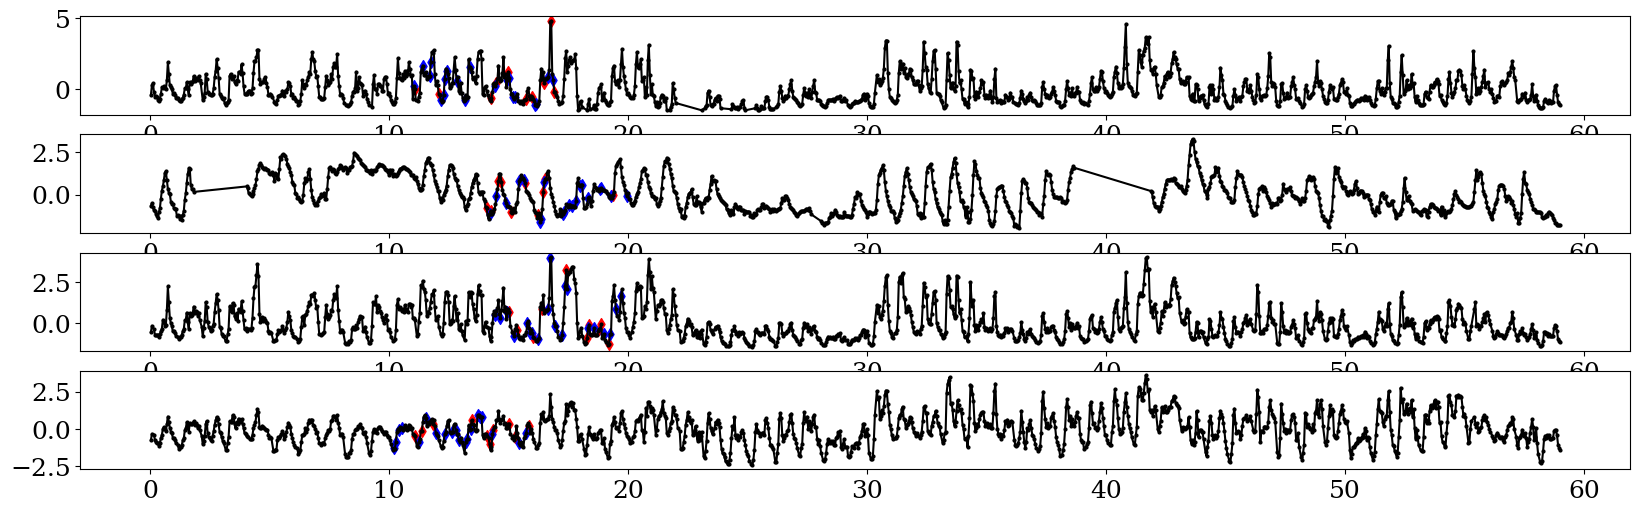

----------------------------------------------------------------------------------------------------






In [13]:
#split_day=20
context_x,context_y,target_x,target_y= prepare_batch_new(dataset_dict , nbatch = 3,batch_npoints=(10,20), intrain = True)
print('context_x.shape,context_y.shape,target_x.shape,target_y.shape')
print(context_x.shape,context_y.shape,target_x.shape,target_y.shape)

plt.figure(figsize=(20,1.5*num_channels))
for ith in range(num_channels):
    plt.subplot(num_channels,1,ith+1)
    plt.scatter(context_x[2][:,ith],context_y[2][:,ith],color='r',marker='d',label='context')
    #plt.plot(context_x[2][:,ith],context_y[2][:,ith],'r')
    
    plt.scatter(target_x[2][:,ith],target_y[2][:,ith],color='b',marker='d',label='target')
    #plt.plot(target_x[2][:,ith],target_y[2][:,ith],'b')    
    
    plt.plot(dataset_dict[ith]['x'],dataset_dict[ith]['y'],'k-o',markersize=2)
    #plt.legend(loc='upper left',fontsize=18)    
    #plt.xlim(xlim_)
plt.show()
print('-'*100)
print('\n'*3)
    
    
    
# #context_x,context_y,target_x,target_y = prepare_batch(dataset_dict, time_dict_index , nbatch = 3,batch_npoints=(50,50), intrain = False)
# context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict , nbatch = 3,batch_npoints=(10,10), intrain = False)

# plt.figure(figsize=(20,1.5*num_channels))
# for ith in range(num_channels):
#     plt.subplot(num_channels,1,ith+1)
#     plt.scatter(context_x[2][:,ith],context_y[2][:,ith],color='r',marker='d',label='context')
#     #plt.plot(context_x[2][:,ith],context_y[2][:,ith],'r')
    
#     plt.scatter(target_x[2][:,ith],target_y[2][:,ith],color='b',marker='d',label='target')
#     #plt.plot(target_x[2][:,ith],target_y[2][:,ith],'b')    
    
#     plt.plot(dataset_dict[ith]['x'],dataset_dict[ith]['y'],'k')
#     plt.legend(loc='upper left',fontsize=18)    
#     #plt.xlim(xlim_)
    
# plt.show()
# print('-'*100)
# print('\n'*3)



# #context_x,context_y,target_x,target_y = prepare_batch(dataset_dict, time_dict_index , nbatch = 3,batch_npoints=(50,50), intrain = False)
# context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict , nbatch = 3,batch_npoints=(50,100), intrain = False, forfig=True)

# plt.figure(figsize=(20,1.5*num_channels))
# for ith in range(num_channels):
#     plt.subplot(num_channels,1,ith+1)
#     plt.scatter(context_x[2][:,ith],context_y[2][:,ith],color='r',marker='d',label='context')
#     #plt.plot(context_x[2][:,ith],context_y[2][:,ith],'r')
    
#     plt.scatter(target_x[2][:,ith],target_y[2][:,ith],color='b',marker='d',label='target')
#     #plt.plot(target_x[2][:,ith],target_y[2][:,ith],'b')    
    
#     plt.plot(dataset_dict[ith]['x'],dataset_dict[ith]['y'],'k')
#     plt.legend(loc='upper left',fontsize=18)    
#     #plt.xlim(xlim_)
    
# plt.show()


## preparation dataset: bramblemet
### checked working but exploration quite not fitted well

In [14]:
#split_day

# from test_baseline import Convcnp,compute_loss_baseline
# from test_baseline_latent import  Convcnp_latent, compute_loss_baselinelatent
# #from test_correlatenp import  CGP_Convnp,compute_loss_gp        
# from test_mocorrelatenp import  CGP_Convnp,compute_loss_gp        

from test_baseline import Convcnp,compute_loss_baseline
from test_baseline_latent import  Convcnp_latent, compute_loss_baselinelatent
from test_dep_correlatenp import  DCGP_Convnp,compute_loss_gp  
from test_ind_correlatenp import  ICGP_Convnp,compute_loss_gp  
from test_dep_correlatenp import  DCGPCAT_Convnp,compute_loss_gp  


 



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def to_numpy(x):
    """Convert a PyTorch tensor to NumPy."""
    return x.squeeze().detach().cpu().numpy()




num_channels = 4
nsamples_latent=10
#nsamples_gp = 10
nsamples_gp = 10



lr = 0.001
weight_decay=1e-4
#cnntype = 


init_lengthscale = 0.1
#init_lengthscale = 0.5
#def get_model(modelname='gp'):        
def get_model(modelname='gpdep',cnntype='deep'):        
    
    if modelname == 'base':
        model = Convcnp(in_dims=1,out_dims=1,num_channels=num_channels,cnntype=cnntype,init_lengthscale=init_lengthscale).cuda()
        opt = torch.optim.Adam(model.parameters(), lr=lr,weight_decay = weight_decay)
        lossfun = compute_loss_baseline

    if modelname == 'baselatent':
        model = Convcnp_latent(in_dims=1,out_dims=1,num_channels=num_channels,num_postsamples=nsamples_latent,cnntype=cnntype,init_lengthscale=init_lengthscale).cuda()
        opt = torch.optim.Adam(model.parameters(), lr=lr,weight_decay = weight_decay)
        lossfun = compute_loss_baselinelatent
        
    #if modelname == 'gp_ind':
    if modelname == 'gpind':        
        model = ICGP_Convnp(in_dims=1,out_dims=1,num_channels=num_channels,num_postsamples=nsamples_gp,cnntype=cnntype,init_lengthscale=init_lengthscale).cuda()
        opt = torch.optim.Adam(model.parameters(), lr=lr,weight_decay = weight_decay)
        lossfun = compute_loss_gp
        
        
    #if modelname == 'gp_dep':
    if modelname == 'gpdep':        
        model = DCGP_Convnp(in_dims=1,out_dims=1,num_channels=num_channels,num_postsamples=nsamples_gp,cnntype=cnntype,init_lengthscale=init_lengthscale).cuda()
        opt = torch.optim.Adam(model.parameters(), lr=lr,weight_decay = weight_decay)
        lossfun = compute_loss_gp
        
    #if modelname == 'gp_dep':
    if modelname == 'gpdep2':        
        model = DCGPCAT_Convnp(in_dims=1,out_dims=1,num_channels=num_channels,num_postsamples=nsamples_gp,cnntype=cnntype,init_lengthscale=init_lengthscale).cuda()
        opt = torch.optim.Adam(model.parameters(), lr=lr,weight_decay = weight_decay)
        lossfun = compute_loss_gp
      
    return model,opt,lossfun


In [15]:
def merge_allset_1d(xc,yc,xt,yt):
    xct = torch.cat([xc,xt],dim=1)
    yct = torch.cat([yc,yt],dim=1)
    xct,s_idx =torch.sort(xct,dim=1)

    if len(xc.size()) == 3:
        yct = torch.gather(yct,1,s_idx)    
    if len(xc.size()) == 4:
        yct = torch.gather(yct,1,s_idx[:,:,0,:])
    return xct,yct
    

    
    
    
#reglamda=1.
proposed_model_list = ['gpind','gpdep','gpdep2']
#def train_epochs_with_dict(set_dict_epoch,model,opt,lossfun,trainmodel='convcnp',trainprogress_ratio = 0.0):
#def train_epochs(dataset_dict,time_dict_index,model,opt,lossfun,ntask=4,nbatch=32,ncontext=32,ntarget=2*32):
def train_epochs(dataset_dict,model,opt,lossfun,ntask=4,nbatch=32,ncontext=32,ntarget=2*32):
    
    model.train()
    likelihoods = []
    
    #ntask = set_dict_epoch['context_x'].size(0)
    for _ in range(ntask):
                
        #ncontext_rntarget_r 
        context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, 
                                                                  nbatch = nbatch,
                                                                  batch_npoints=(ncontext ,ntarget), 
                                                                  intrain = True)        
        
        
        #context_x,context_y,target_x,target_y = nparray2tensor(context_x,context_y,target_x,target_y)        
        if model.modelname in proposed_model_list and len(context_x.size()) == 3:        
            context_x,target_x=context_x.unsqueeze(dim=-2),target_x.unsqueeze(dim=-2)        
        
        target_x,target_y = merge_allset_1d(context_x,context_y,target_x,target_y)

        #predict & train models
        y_mean,y_std = model(context_x.cuda(),context_y.cuda(),target_x.cuda())    
        obj = lossfun( y_mean,y_std, target_y.cuda())

        
        
        obj.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(),max_grad_norm)
        opt.step()
        opt.zero_grad()
        
        #losses.append(obj.item())
        likelihoods.append(obj.cpu().data.numpy())        
        
    avg_ll,std_ll = np.array(likelihoods).mean().round(2),(np.array(likelihoods).std()/np.sqrt(ntask)).round(2)
    return avg_ll,std_ll       




#def validate_epochs(dataset_dict,time_dict_index,model,ntask=128,nbatch=32,ncontext=32,ntarget=2*32,train_range= None,test_range=None,intrain=True):
#def validate_epochs(dataset_dict,time_dict_index,model,lossfun,ntask=128,nbatch=4,ncontext=32,ntarget=2*32,train_range= None,test_range=None,intrain=True):
def validate_epochs(dataset_dict,model,lossfun,ntask=128,nbatch=4,ncontext=32,ntarget=2*32,train_range= None,test_range=None,intrain=True):

    # large is better 
    model.eval()
    likelihoods = []
    
    #ntask = set_dict_epoch['context_x'].size(0)    
    for _ in range(ntask):        
        
        context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, 
                                                                  nbatch = nbatch,
                                                                  batch_npoints=(ncontext ,ntarget), 
                                                                  intrain = intrain)

         
        
        if model.modelname in proposed_model_list and len(context_x.size()) == 3:                
            context_x,target_x=context_x.unsqueeze(dim=-2),target_x.unsqueeze(dim=-2)
                    
        
        
        y_mean,y_std = model(context_x.cuda(),context_y.cuda(),target_x.cuda())        
        #obj = -compute_nll( y_mean,y_std, target_y.cuda())
        obj = -lossfun( y_mean,y_std, target_y.cuda())

                    
        #if trainmodel in base_model_list:
        #    obj = -compute_nll( y_mean,y_std, target_y.cuda())
        #if trainmodel in latent_model_list:
        #    obj = -compute_nll_latent( y_mean, y_std, target_y.cuda())            
            
        likelihoods.append(obj.cpu().data.numpy())        
                
    avg_ll,std_ll = np.array(likelihoods).mean().round(2),(np.array(likelihoods).std()/np.sqrt(ntask)).round(2)
    return avg_ll,std_ll       
    


def validate_epochs_pair(dataset_pair,model,lossfun):
    # large is better 
    model.eval()
    likelihoods = []
    
 

    for context_x,context_y,target_x,target_y in dataset_pair:        
        
        
        if model.modelname in proposed_model_list and len(context_x.size()) == 3:                
            context_x,target_x=context_x.unsqueeze(dim=-2),target_x.unsqueeze(dim=-2)
                            

        #print(context_x)
        y_mean,y_std = model(context_x.cuda(),context_y.cuda(),target_x.cuda())        
        #obj = -compute_nll( y_mean,y_std, target_y.cuda())
        obj = -lossfun( y_mean,y_std, target_y.cuda())

                    
        #if trainmodel in base_model_list:
        #    obj = -compute_nll( y_mean,y_std, target_y.cuda())
        #if trainmodel in latent_model_list:
        #    obj = -compute_nll_latent( y_mean, y_std, target_y.cuda())            
            
        likelihoods.append(obj.cpu().data.numpy())        
                
    avg_ll,std_ll = np.array(likelihoods).mean().round(2),(np.array(likelihoods).std()/np.sqrt(ntask)).round(2)
    return avg_ll,std_ll       
    #return obj.cpu().data
    

## train model 

In [16]:
# #-------------------------------------------
# # train
# #------------------------------------------
# #nepochs=3000
# nepochs=6000
# #nepochs=10000

# ntask,nbatch,ncontext,ntarget = 1,4,20,100
# #ntask_v,nbatch_v,ncontext_v,ntarget_v = 5,4,10,50



# #-------------------------------------------
# # build the model
# #------------------------------------------
# # #model_type = 'convcnp'
# # model_type = 'anp'
# # #model_type = 'propose_v3'
# # model,opt = build_model(model_type=model_type)
# # model.num_params




# #modelname = 'base'
# #modelname = 'baselatent'
# #modelname = 'gpind'
# modelname = 'gpdep'

# cnntype = 'shallow'
# #cnntype = 'deep'

# saved_modelparam_path = './param_airquality/{}_{}.pth'.format(modelname,cnntype)



# model,opt,lossfun = get_model(modelname=modelname,cnntype=cnntype)
# model.num_params
# model




In [17]:
# #-------------------------------------------
# # train
# #------------------------------------------
# nepochs=2000
# # ntask,nbatch,ncontext,ntarget = 1,4,20,100
# # ntask_v,nbatch_v,ncontext_v,ntarget_v = 5,4,20,100



# #-------------------------------------------
# # build the model
# #------------------------------------------
# # #model_type = 'convcnp'
# # model_type = 'anp'
# # #model_type = 'propose_v3'
# # model,opt = build_model(model_type=model_type)
# # model.num_params




# modelname = 'base'
# #modelname = 'baselatent'
# #modelname = 'gpind'
# #modelname = 'gpdep'


# cnntype = 'shallow'
# #cnntype = 'deep'

# saved_modelparam_path = './param_airquality/{}_{}.pth'.format(modelname,cnntype)



# model,opt,lossfun = get_model(modelname=modelname,cnntype=cnntype)
# model.num_params
# model





In [18]:
# # ntask=128
# ntask=8
# nbatch=16
# nepochs=400

# best_loss = -np.inf
# for i in range(nepochs + 1):   
#     #ncontext_r = np.random.randint(10,50)  
#     ncontext_r = np.random.randint(5,10)      
#     #ntarget_r =np.random.randint(50,100)
#     ntarget_r = 24-ncontext_r
#     avg_loss,loss_list = train_epochs(dataset_dict,model,opt,lossfun,
#                                       ntask=ntask,nbatch=nbatch,ncontext=ncontext_r,ntarget=ntarget_r)


#     #ncontext,ntarget = np.random.randint(10,50,2)        
#     ncontext,ntarget = 7,20        
#     #val_loss,_ = validate_epochs(gen_cls,model,ntask=16,nbatch=16,ncontext=ncontext,ntarget=50,intrain=True)
#     val_loss,_ = validate_epochs(dataset_dict,model,lossfun,
#                                  ntask=ntask,nbatch=nbatch,ncontext=ncontext,ntarget=ntarget)


#     if best_loss < val_loss:
        
#         best_loss = val_loss        
#         saved_dict = {'epoch': i + 1,
#                      'best_acc_top1': best_loss,                         
#                      'state_dict': model.state_dict(),
#                      'optimizer': opt.state_dict()}
#         torch.save(saved_dict,saved_modelparam_path)
#         #print('epochs [{}/{}] | param_saved at {}'.format(i,nepochs,saved_modelparam_path ))

#     if i% 10 ==0:
#         print('epochs [{}/{}] | train loss {:.3f}, val loss {:.3f} \t\t param_saved at {}'.format(i,nepochs,avg_loss,val_loss,saved_modelparam_path ) )       
#         #print(loss_list)    
#     torch.cuda.empty_cache()

# print('done')


## evaluation metric

In [75]:
# nepochs=2000
# lr=0.1
# saved_modelparam_path = './param_airquality/base_shallow_nepochs2000_initl{}.pth'.format(lr)
# #saved_modelparam_path = './param_airquality/gpind_shallow_nepochs{}_initl{}.pth'.format(nepochs,lr)
# #saved_modelparam_path = './param_airquality/gpdep_shallow_nepochs{}_initl{}.pth'.format(nepochs,lr)


# modelname = saved_modelparam_path.split('/')[-1].split('_')[0]
# cnntype = saved_modelparam_path.split('/')[-1].split('_')[1]
# #model,_ = build_model(model_type=model_type)
# model,_,lossfun = get_model(modelname=modelname,cnntype=cnntype)

# load_dict = torch.load(saved_modelparam_path )
# model.load_state_dict(load_dict['state_dict'])   



#saved_modelparam_path1 = './param_waterdepth/base_shallow_nepochs1000_initl0.1.pth'
#saved_modelparam_path1 = './param_airquality/base_shallow_nepochs1000_initl0.01.pth'
saved_modelparam_path1 = './param_airquality/base_shallow_nepochs1000_initl0.01.pth'


#saved_modelparam_path2 = './param_waterdepth/gpind_shallow_nepochs2000_initl1.0.pth'
saved_modelparam_path2 = './param_airquality/gpind_shallow_nepochs1000_initl0.1.pth'
#saved_modelparam_path2 = './param_waterdepth/gpdep_shallow_nepochs1000_initl1.0.pth'



# #saved_modelparam_path = './param_waterdepth/gpdep_shallow_nepochs2000_initl1.0.pth'
saved_modelparam_path3 = './param_airquality/gpdep_shallow_nepochs1000_initl0.1.pth'
#saved_modelparam_path3 = './param_airquality/gpdep_shallow_nepochs2000_initl0.1.pth'

saved_modelparam_path4 = './param_airquality/gpdep2_shallow_nepochs1000_initl0.05.pth'


#saved_modelparam_path_list = [saved_modelparam_path1,saved_modelparam_path2]
saved_modelparam_path_list = [saved_modelparam_path1,saved_modelparam_path2,saved_modelparam_path3]
#saved_modelparam_path_list = [saved_modelparam_path1,saved_modelparam_path2,saved_modelparam_path3,saved_modelparam_path4]

In [76]:
#model.gpsampler.kernel.prepare_cross_params()
#model.gpsampler.kernel.prepare_cross_params()

#modelname

In [77]:


# #ntask = 256
# #modelspec = '{}_{}_nsample{}_initl{}'.format(modelname,cnntype,nsamples_gp,init_lengthscale )
# ntask,nbatch,_,ntarget = 16,8,20,20
# #ncontext_list = [10,20,30,50]
# #ncontext_list = [3,5,7,10,15]
# ncontext_list = [5,10,15,20]

# # results_list = []
# # for ncontext in ncontext_list:
# #     #val_loss_m,val_loss_s = validate_epochs(dataset_dict,time_dict_index,model,ntask=ntask,nbatch=nbatch,ncontext=ncontext,ntarget=ntarget, intrain=False)
# #     val_loss_m,val_loss_s = validate_epochs(dataset_dict,model,lossfun,ntask=ntask,nbatch=nbatch,ncontext=ncontext,ntarget=ntarget , intrain=False)
# #     results_list.append((val_loss_m,val_loss_s))
# # #val_loss_m,val_loss_s


# results_list_m_list = []
# results_list_s_list = []

# for saved_modelparam_path in saved_modelparam_path_list:
#     modelspec =  saved_modelparam_path.split('/')[-1][:-4]

#     modelname = saved_modelparam_path.split('/')[-1].split('_')[0]
#     cnntype = saved_modelparam_path.split('/')[-1].split('_')[1]

#     #model,_ = build_model(model_type=model_type)
#     model,_,lossfun = get_model(modelname=modelname,cnntype=cnntype)

#     load_dict = torch.load(saved_modelparam_path)
#     model.load_state_dict(load_dict['state_dict'])   


#     results_list_m = []
#     results_list_s = []
#     for ncontext in ncontext_list:
#         val_loss_m,val_loss_s = validate_epochs(dataset_dict,model,lossfun,ntask=ntask,nbatch=nbatch,ncontext=ncontext,ntarget=ntarget , intrain=False)
#         results_list_m.append(val_loss_m)
#         results_list_s.append(val_loss_s)
    
#     results_list_m_list.append(results_list_m)
#     results_list_s_list.append(results_list_s)

#     print('modelspec: {} \t {},{}'.format(modelspec ,results_list_m,results_list_s))

In [87]:
#ntask = 256
# ntask,nbatch,_,ntarget = 16,8,20,24
# ncontext_list = [3,6,9,12]

ntask,nbatch,ntarget = 128,4,40
#ncontext_list = [3,6,9,12,15,18,21]
#ncontext_list = [5,10,15,20]
ncontext_list = [5,10,15,20,25]

result_dict = {}
for ncontext in ncontext_list:
    dataset_pair = []
    for _ in range(ntask):
        ntarget = np.random.randint(20,40)
        
        context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, 
                                                                  nbatch = nbatch,
                                                                  batch_npoints=(ncontext ,ntarget), 
                                                                  intrain = True)

#         context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, 
#                                                                   nbatch = nbatch,
#                                                                   batch_npoints=(ncontext ,ntarget), 
#                                                                   intrain = False)

#         context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, 
#                                                                   nbatch = nbatch,
#                                                                   batch_npoints=(ncontext ,ntarget), 
#                                                                   intrain = False,
#                                                                   forfig=True)

        dataset_pair.append((context_x,context_y,target_x,target_y))    
    
    #print(dataset_pair[0].shape,dataset_pair[2].shape)

    for saved_modelparam_path in saved_modelparam_path_list:
        modelspec =  saved_modelparam_path.split('/')[-1][:-4]
        modelname = saved_modelparam_path.split('/')[-1].split('_')[0]
        cnntype = saved_modelparam_path.split('/')[-1].split('_')[1]

        #model,_ = build_model(model_type=model_type)
        model,_,lossfun = get_model(modelname=modelname,cnntype=cnntype)

        load_dict = torch.load(saved_modelparam_path)
        model.load_state_dict(load_dict['state_dict'])   


        results_list_m = []
        results_list_s = []
        val_loss_m,val_loss_s = validate_epochs_pair(dataset_pair,model,lossfun)
        
        #results_list_m.append(val_loss_m)
        #results_list_s.append(val_loss_s)
        
        #print('modelspec: {} \t {},{}'.format(modelspec ,val_loss_m,val_loss_s))        
    
        if model.modelname not in result_dict.keys():
            result_dict[model.modelname] = {'m':[],'s':[],'modelspec':modelspec}
            result_dict[model.modelname]['m'].append(val_loss_m)  
            result_dict[model.modelname]['s'].append(val_loss_s)              
        else:
            result_dict[model.modelname]['m'].append(val_loss_m)  
            result_dict[model.modelname]['s'].append(val_loss_s)  
            #= {'m':[],'s':[]}            
            #= {'m':[],'s':[]}
            
    #results_list_m_list.append(results_list_m)
    #results_list_s_list.append(results_list_s)



In [88]:
result_dict

{'base': {'m': [-145.5, -127.39, -113.37, -106.05, -95.68],
  's': [2.59, 2.57, 2.37, 1.98, 1.97],
  'modelspec': 'base_shallow_nepochs1000_initl0.01'},
 'gpind': {'m': [-146.74, -128.08, -113.38, -106.17, -97.5],
  's': [2.69, 2.49, 2.29, 1.97, 2.01],
  'modelspec': 'gpind_shallow_nepochs1000_initl0.1'},
 'gpdep': {'m': [-141.26, -123.96, -111.84, -106.06, -98.84],
  's': [2.56, 2.51, 2.33, 2.03, 2.12],
  'modelspec': 'gpdep_shallow_nepochs1000_initl0.1'}}

In [85]:

figsiz_ = (5,4)
#bidx=4
# wspace_ = 0.5
# hspace_ = 0.25
fontsiz_ = 18

# ylim_ = [-4,4.5]
# #xlim_ = [0,29]
# xlim_ = [8,31.1]

# yticks_ = [-3,0,3]
# xticks_ = list(np.arange(xlim_[0],xlim_[1],dtype=np.int))[::3]

xticks_=ncontext_list
#yticks_=[-70,-80,-90,-100,-110]

capsize_ = 4
capthick_ = 3
linewidth_ = 2.5

datatype = 'airqualtiy'

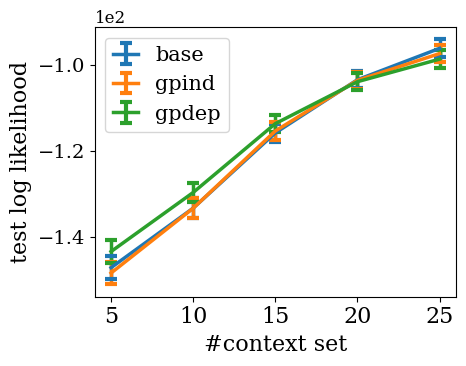

'./airqualtiy_comparison_ntarget21'

In [86]:
fig = plt.figure(figsize=figsiz_)
x= ncontext_list

#convcnp
y1,y11 = result_dict['base']['m'],result_dict['base']['s']
plt.errorbar(x, y1, yerr = y11 , label='base', linewidth=linewidth_, capsize=capsize_, capthick=capthick_)

#gpind
y1,y11 = result_dict['gpind']['m'],result_dict['gpind']['s']
plt.errorbar(x, y1, yerr = y11  , label='gpind', linewidth=linewidth_, capsize=capsize_, capthick=capthick_)

#gpdep
y1,y11 = result_dict['gpdep']['m'],result_dict['gpdep']['s']
plt.errorbar(x, y1, yerr = y11  , label='gpdep', linewidth=linewidth_, capsize=capsize_, capthick=capthick_)

# #gpdep2
# y1,y11 = result_dict['gpdep2']['m'],result_dict['gpdep2']['s']
# plt.errorbar(x, y1, yerr = y11  , label='gpdep2', linewidth=linewidth_, capsize=capsize_, capthick=capthick_)




plt.xlabel('#context set',fontsize=fontsiz-2)
plt.ylabel('test log likelihood',fontsize=fontsiz-2)

plt.xticks(xticks_,fontsize=fontsiz-2)
#plt.yticks(yticks_,fontsize=fontsiz-4)
plt.yticks(fontsize=fontsiz-4)

plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(fontsiz_-6)


leg = plt.legend(fontsize=fontsiz_-3,handlelength= 1.2, columnspacing =1.0)
#leg = plt.legend(loc = 'lower left',fontsize=fontsiz_-4,ncol=5,handlelength= 1.2, columnspacing =1.0)
for ii in leg.legendHandles:
    ii.set_linewidth(3)     

  

fig.tight_layout()    
savefigname = './' + datatype + '_comparison_ntarget{}'.format(ntarget) 
#plt.savefig(savefigname  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()
    
savefigname 

In [30]:
model.gpsampler.kernel.prepare_cross_params()

(tensor([[4.4631e-16, 4.6295e-16, 4.5712e-16, 3.7175e-16, 4.6295e-16, 4.7849e-16,
          4.7355e-16, 3.9079e-16, 4.5712e-16, 4.7355e-16, 4.6815e-16, 3.8169e-16,
          3.7175e-16, 3.9079e-16, 3.8169e-16, 2.9848e-16]], device='cuda:0',
        grad_fn=<ViewBackward>),
 tensor([[ 9.6326,  4.9817,  4.7656,  4.8583,  4.9817, 10.3176,  4.9274,  5.0266,
           4.7656,  4.9274,  9.4317,  4.8067,  4.8583,  5.0266,  4.8067,  9.8020]],
        device='cuda:0', grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.3322, 0.3297, 0.3308, 0.3322, 1.0000, 0.3316, 0.3327, 0.3297,
          0.3316, 1.0000, 0.3302, 0.3308, 0.3327, 0.3302, 1.0000]],
        device='cuda:0', grad_fn=<ViewBackward>))

## analysis on functional features

In [101]:
saved_modelparam_path = saved_modelparam_path3


modelspec =  saved_modelparam_path.split('/')[-1][:-4]
modelname = saved_modelparam_path.split('/')[-1].split('_')[0]
cnntype = saved_modelparam_path.split('/')[-1].split('_')[1]

#model,_ = build_model(model_type=model_type)
model,_,lossfun = get_model(modelname=modelname,cnntype=cnntype)

load_dict = torch.load(saved_modelparam_path)
model.load_state_dict(load_dict['state_dict'])   
print(model)
print('\n\n')
#print(model.gpsampler.kernel.prepare_cross_params())


DCGP_Convnp(
  (activation): Sigmoid()
  (cnn): cnn_shallow(
    (cnn): Sequential(
      (0): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (3): ReLU()
      (4): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): ReLU()
      (6): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (7): ReLU()
      (8): Conv1d(16, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (gpsampler): Multioutput_GPsampler(
    (kernel): SM_kernel()
  )
  (gp_linear): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
  )
  (cnn_linear): Sequential(
    (0): Linear(in_features=8, out_features=20, bias=True)
  )
  (smoother): ConvDeepset(C_in=1, C_out=1, )
  (pred_linear_mu): Sequential(
    (0): Linear(in_features=20, out_features=4, bias=True)
  )
  (pred_linear_logstd): Sequential(
    (0): Linear(in_features=20, out_features=4, bias=True

In [102]:
#----------------------------------
# small datset
#----------------------------------
#ncontext,ntarget = 50,200
ncontext,ntarget = 10,40

#context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = True)
context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False)
#context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=True)


#min_x,max_x = 0.0,31.1
pred_xlb,pred_xub = torch.cat([context_x,target_x],dim=1).min().item()-0.1,torch.cat([context_x,target_x],dim=1).max().item()+0.1

#pred_xlb,pred_xub = dataset_dict['split_day'],max_x
#pred_xlb,pred_xub = min_x,dataset_dict['split_day']

full_x = torch.linspace(pred_xlb,pred_xub,3*ntarget)[None,:].repeat(num_channels,1).T
full_x = full_x[None,:,:]
full_x = full_x.unsqueeze(dim=-2)  

In [103]:
figsiz_ = (11,2.5*4)
#bidx=4
wspace_ = 0.5
hspace_ = 0.25
fontsiz_ = 18

ylim_ = [-4.5,4.5]
xlim_ = [pred_xlb+2,pred_xub-2]

#xlim_ = [0-0.01,max_x+0.01]
#pred_xlb,pred_xub = 14,16
#xlim_ = [min_x,max_x]
#xlim_ = [30,40]


yticks_ = [-1,0,1]
xticks_ = list(np.arange(int(xlim_[0]),int(xlim_[1]),dtype=np.int))[::5]

color_list = ['r','b','g','m']


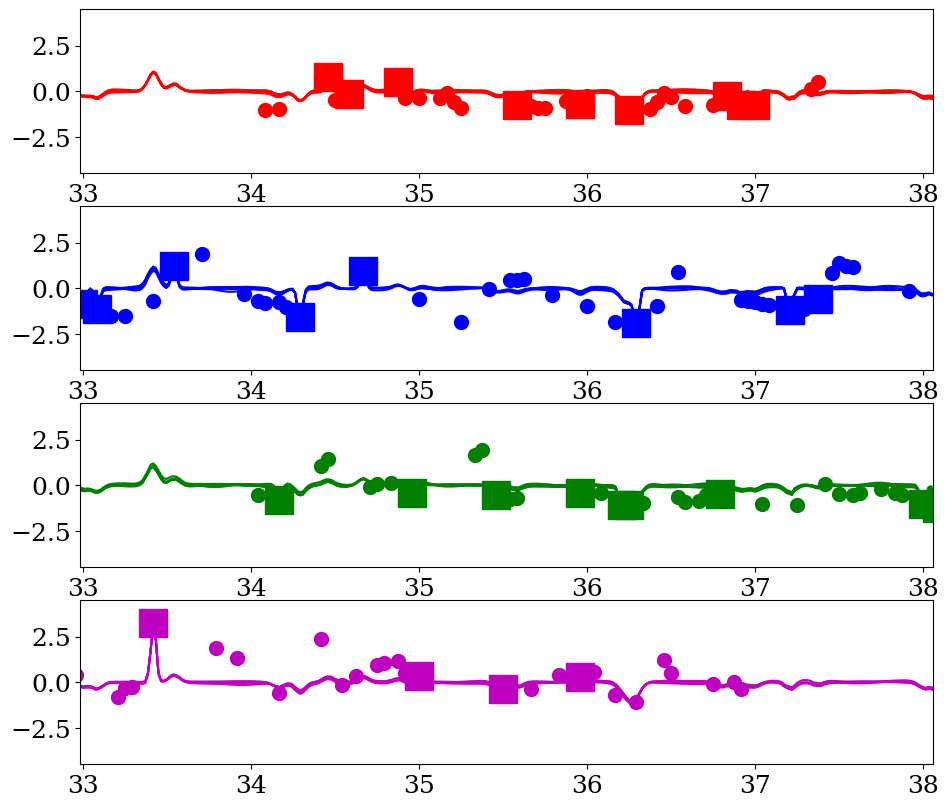

In [104]:
#context_x.shape,target_x.shape,full_x.shape


# xlim_=[3-delta,6+delta]
# ylim_=[-y_-delta,y_+delta]

num_channels=4
idx=0
#train_set = loaded['valid_set']
# xc = context_x[idx][...,None,:]
# yc = context_y[idx]
# xt = target_x[idx][idx][...,None,:]
# yt = target_y[idx]


xc = context_x[...,None,:]
yc = context_y
xt = target_x[...,None,:]
yt = target_y


tmp_numsamples=5
if model.modelname in proposed_model_list:    
    
    post_samples,xa = model.sample_functionalfeature(xc.cuda(),yc.cuda(),xt.cuda(),numsamples=tmp_numsamples)
    model.num_samples = tmp_numsamples 

else:    
    #xc = context_x
    #yc = context_y
    #xt = target_x
    #yt = target_y
    
    post_samples,xa = model.sample_functionalfeature(xc[:,:,0,:].cuda(),yc[0].cuda(),xt[:,:,0,:].cuda(),numsamples=1)
    post_samples = post_samples[:,None,:,:]



# #figsiz_=(15,3*nchannels)
# plt.figure(figsize=figsiz_)
# color_list = ['r','b','g','m']
# for i in range(num_channels):
#     plt.subplot(num_channels,1,i+1)
#     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=20)     
#     plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'o',markersize=10)     
    
#     #plt.plot(xa[0,:,0].cpu().data.numpy(),prior_samples[0,:,i].cpu().data.numpy(),color_list[i]+'-s',markersize=3)            
    
#     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),pmu_xt[0,:,i].cpu().data.numpy(),color_list[i]+'s-')
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()



plt.figure(figsize=figsiz_)
#color_list = ['r','b','g']
for i in range(num_channels):
    plt.subplot(num_channels,1,i+1)
    #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'o',markersize=10)     
    plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=20)     
    plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'o',markersize=10)     
    
    for j in range(model.num_samples):
        #plt.plot(xa[0,:,0].cpu().data.numpy(),post_samples[0,j,:,i].cpu().data.numpy(),color_list[i]+'-s',markersize=2)        
        plt.plot(xa[0,:,0].cpu().data.numpy(),post_samples[0,j,:,i].cpu().data.numpy(),color_list[i])        

    plt.xlim(xlim_)
    plt.ylim(ylim_)
plt.show()


In [105]:
model.gpsampler.kernel.prepare_cross_params()

(tensor([[4.4631e-16, 4.6295e-16, 4.5712e-16, 3.7175e-16, 4.6295e-16, 4.7849e-16,
          4.7355e-16, 3.9079e-16, 4.5712e-16, 4.7355e-16, 4.6815e-16, 3.8169e-16,
          3.7175e-16, 3.9079e-16, 3.8169e-16, 2.9848e-16]], device='cuda:0',
        grad_fn=<ViewBackward>),
 tensor([[ 9.6326,  4.9817,  4.7656,  4.8583,  4.9817, 10.3176,  4.9274,  5.0266,
           4.7656,  4.9274,  9.4317,  4.8067,  4.8583,  5.0266,  4.8067,  9.8020]],
        device='cuda:0', grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.3322, 0.3297, 0.3308, 0.3322, 1.0000, 0.3316, 0.3327, 0.3297,
          0.3316, 1.0000, 0.3302, 0.3308, 0.3327, 0.3302, 1.0000]],
        device='cuda:0', grad_fn=<ViewBackward>))

## prediction

In [106]:
saved_model_path = './fig/exp2_air/'
datatype = 'airqualtiy'

In [107]:
saved_modelparam_path = saved_modelparam_path3


modelspec =  saved_modelparam_path.split('/')[-1][:-4]
modelname = saved_modelparam_path.split('/')[-1].split('_')[0]
cnntype = saved_modelparam_path.split('/')[-1].split('_')[1]

#model,_ = build_model(model_type=model_type)
model,_,lossfun = get_model(modelname=modelname,cnntype=cnntype)

load_dict = torch.load(saved_modelparam_path)
model.load_state_dict(load_dict['state_dict'])   
print(model)
# print('\n\n')
# print(model.gpsampler.kernel.prepare_cross_params())



DCGP_Convnp(
  (activation): Sigmoid()
  (cnn): cnn_shallow(
    (cnn): Sequential(
      (0): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (3): ReLU()
      (4): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): ReLU()
      (6): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (7): ReLU()
      (8): Conv1d(16, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (gpsampler): Multioutput_GPsampler(
    (kernel): SM_kernel()
  )
  (gp_linear): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
  )
  (cnn_linear): Sequential(
    (0): Linear(in_features=8, out_features=20, bias=True)
  )
  (smoother): ConvDeepset(C_in=1, C_out=1, )
  (pred_linear_mu): Sequential(
    (0): Linear(in_features=20, out_features=4, bias=True)
  )
  (pred_linear_logstd): Sequential(
    (0): Linear(in_features=20, out_features=4, bias=True

In [108]:
# #----------------------------------
# # small datset
# #----------------------------------
# ncontext,ntarget = 20,40
# #ncontext,ntarget = 30,100

# #context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, time_dict_index , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = True)
# #context_x,context_y,target_x,target_y = prepare_batch(dataset_dict, time_dict_index , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False)
# #context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, time_dict_index , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=True)
# #context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, split_day , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=True)

# #context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, time_dict_index , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False)



# #context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=False)
# context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=True)



In [125]:

#----------------------------------
# small datset
#----------------------------------
#ncontext,ntarget = 50,200
ncontext,ntarget = 20,40

#context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = True)
context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False)
#context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False, forfig=True)

#context_x,context_y,target_x,target_y = prepare_batch_new(dataset_dict, time_dict_index , nbatch = 1,batch_npoints=(ncontext,ntarget), intrain = False)

#min_x,max_x = 0.0,61.1
#pred_xlb,pred_xub = dataset_dict['split_day'],max_x
pred_xlb,pred_xub = torch.cat([context_x,target_x],dim=1).min().item()-0.1,torch.cat([context_x,target_x],dim=1).max().item()+0.1
#pred_xlb,pred_xub = min_x,dataset_dict['split_day']
full_x = torch.linspace(pred_xlb,pred_xub,2*(ncontext+ntarget))[None,:].repeat(num_channels,1).T
full_x = full_x[None,:,:]


In [126]:

if model.modelname in proposed_model_list and len(context_x.size()) == 3:        
    context_x,target_x=context_x.unsqueeze(dim=-2),target_x.unsqueeze(dim=-2)        
    full_x = full_x.unsqueeze(dim=-2)        
else:
    context_x,target_x=context_x.squeeze(),target_x.squeeze()        
    full_x = full_x.squeeze()        

    if len(context_x.shape)==2:
        context_x = context_x[None,:,:] 
        target_x = target_x[None,:,:] 
        full_x = full_x[None,:,:] 


#full_x = target_x        
        
model.eval()
y_mean, y_std = model(context_x.cuda(),context_y.cuda(),full_x.cuda())





#y_mean, y_std = predict_cross(context_x,context_y,target_x,target_y)
y_mean = y_mean.squeeze().cpu().data.numpy()
y_std = y_std.squeeze().cpu().data.numpy()



context_x_ = context_x.squeeze().cpu().data.numpy()
context_y_ = context_y.squeeze().cpu().data.numpy()
target_x_ = target_x.squeeze().cpu().data.numpy()
target_y_ = target_y.squeeze().cpu().data.numpy()
full_x_ = full_x.squeeze().cpu().data.numpy()



In [127]:
#target_x



## figures

In [128]:
figsiz_ = (11,2.5*4)
#bidx=4
wspace_ = 0.5
hspace_ = 0.25
fontsiz_ = 18

ylim_ = [-2.5,4]
#xlim_ = [0-0.01,max_x+0.01]

#pred_xlb,pred_xub=0,60
pred_xlb,pred_xub = torch.cat([context_x,target_x],dim=1).min().item()-0.1,torch.cat([context_x,target_x],dim=1).max().item()+0.1

xlim_ = [pred_xlb,pred_xub]

#xlim_ = [10,29.1]

yticks_ = [-2,0,2]
xticks_ = list(np.arange(int(xlim_[0]),int(xlim_[1]),dtype=np.int))[::5]

In [129]:
#xlim_

In [130]:
datatype = 'airquality'

In [131]:
cols[1] = 'Temperature'


# #xlim_ = [0,220]
#   '_imputation'+'convcnp'  + '.pdf'


In [132]:

# #bidx=4
# wspace_ = 0.5
# hspace_ = 0.25
# fontsiz_ = 18

# ylim_ = [-3.5,4.2]
# #figsiz_ = (12,3.5)
# #xlim_ = [10,29.1]

# figsiz_ = (20,num_channels*3.)
# #xlim_ = [0-0.1,29+0.1]
# xlim_ = [8-0.1,31+0.1]

# yticks_ = [-3,0,3]
# xticks_ = list(np.arange( int(xlim_[0]),int(xlim_[1])+1,dtype=np.int))[::2]
# xticks_ 




wspace_ = 0.5
hspace_ = 0.25
fontsiz_ = 18

#ylim_ = [-4,4.5]
#figsiz_ = (12,3.5)
#xlim_ = [10,29.1]

figsiz_ = (11,num_channels*2.5)
#xlim_ = [0-0.1,29+0.1]



deltay=0.99
#ylim_ = [1 - deltay,5 + deltay]
#yticks_ = [1,3,5]
fontsiz_ = 18

ybound = [-10,10]



/home/becre1776/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


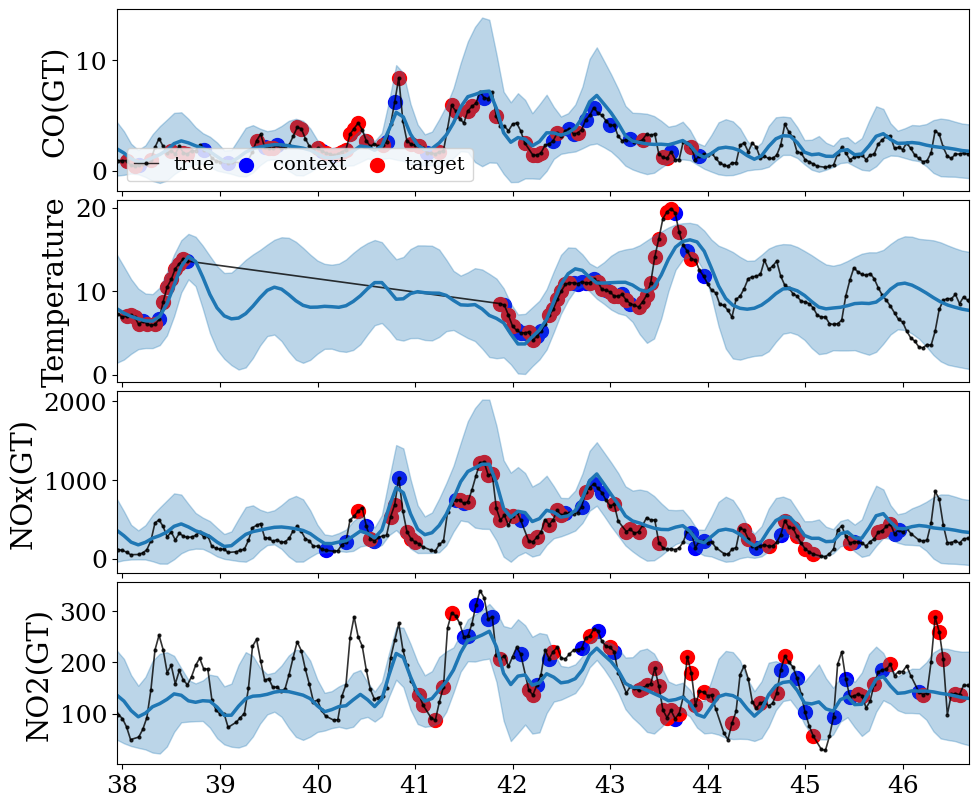

gpdep_shallow_nepochs1000_initl0.1_airquality_full


In [133]:
#xlim_ = [0,220]

#fig = plt.figure(figsize=figsiz_)
fig, axs = plt.subplots(num_channels, figsize=figsiz_, ncols=1, sharex=True , gridspec_kw={'hspace': 0.05})
#fig.subplots_adjust(top=0.95, bottom=0.05, left=0.17, right=0.845, wspace=0,hspace=0)
#fig.subplots_adjust( wspace=0,hspace=0)

for j in range(num_channels):
    #outrain regeion    
    #axs[j].axvspan(xmin = dataset_dict['split_day'] ,xmax = xlim_[1], ymin = ybound[0], ymax = ybound[1],color='gray', alpha=0.4,label='beyond training range')

    #dataset
    transformed_context_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*context_y_[:,j]
    transformed_target_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*target_y_[:,j]    
    transformed_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*dataset_dict[j]['y']
        
    axs[j].scatter(context_x_[:,j],transformed_context_y,color = 'b',label = 'context',s=100)
    axs[j].scatter(target_x_[:,j],transformed_target_y,color = 'r',label = 'target',s=100)    
    #axs[j].plot(dataset_dict[j]['x'],transformed_y,'k',label='true',linewidth=2.)
    axs[j].plot(dataset_dict[j]['x'],transformed_y,'k-o',label='true',markersize=2,linewidth=1.2,alpha=0.8)
    

    
    if len(y_mean.shape)==2:
        transformed_ymean = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*y_mean[:,j]
        transformed_ystd = dataset_dict[j]['ystd']*y_std[:,j]
        
        
        axs[j].plot(full_x_[:,j], transformed_ymean,color='tab:blue',linewidth=2.5)
        axs[j].fill_between(full_x_[:,j],
                            transformed_ymean + 2 *  transformed_ystd,
                            transformed_ymean - 2 *  transformed_ystd,
                            color='tab:blue', alpha=0.3)

        
    if len(y_mean.shape)==3:
        transformed_ymean = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*y_mean[:,:,j]
        transformed_ystd = dataset_dict[j]['ystd']*y_std[:,:,j]
        
        
#         for kk in range(3):
#             axs[j].plot(full_x_[:,j],transformed_ymean[kk,:],color='tab:blue',linewidth=2.5)
#             axs[j].fill_between(full_x_[:,j],
#                                 transformed_ymean[kk,:] + 2 * transformed_ystd[kk,:],
#                                 transformed_ymean[kk,:] - 2 * transformed_ystd[kk,:],
#                                 color='tab:blue', alpha=0.3)
        
        #average figures
        axs[j].plot(full_x_[:,j],transformed_ymean.mean(axis=0),color='tab:blue',linewidth=2.5)
        axs[j].fill_between(full_x_[:,j],
                            transformed_ymean.mean(axis=0) + 2 * transformed_ystd.mean(axis=0),
                            transformed_ymean.mean(axis=0) - 2 * transformed_ystd.mean(axis=0),
                            color='tab:blue', alpha=0.3)


    
    #axs[j].set(xlim=xlim_,ylim=ylim_)
    axs[j].set(xlim=xlim_)
    
    #plt.ylabel('{} ch'.format(j+1),fontsize=fontsiz_)
    axs[j].set_ylabel('{}'.format(cols[j]),fontsize=fontsiz_+3)
    #plt.xlim(xlim_)
    #axs[j].set_yticks(yticks_)

    #plt.xlim(xlim_)
    #plt.ylim(ylim_)

    
    if j == 0:
        leg = axs[j].legend(loc = 'lower left',fontsize=fontsiz_-4.,ncol=5,handlelength= 1.2, columnspacing =1.0)
        for ii in leg.legendHandles:
            ii.set_linewidth(1)      
        
    #plt.xticks(xticks_,fontsize=fontsiz_-2)
    #plt.xticks([],fontsize=fontsiz_-2)        
    if j==3:
        #axs[j].set_xticks(xticks_)
        pass
    else:
        #axs[j].set_xticks()
        pass


    

fig.tight_layout()    
#plt.savefig(saved_model_path + datatype + '_imputation'+'_convcnp'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig(saved_model_path + modelspec + '_' + datatype + '_ch{}'.format(j)  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
#savefigname =  modelspec + '_' + datatype + '_ch{}'.format(j)
savefigname =  modelspec + '_' + datatype + '_full'
#plt.savefig('./'  + savefigname   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')

plt.show()
    
    #plt.show()
#'./'+datatype + '_imputation'+'convcnp'  + '.pdf'
print(savefigname )

In [118]:

# #bidx=4
# wspace_ = 0.5
# hspace_ = 0.25
# fontsiz_ = 18

# #ylim_ = [-3.5,4.2]
# #ylim_ = [[0,4.2],[5,20],[150,300],[50,220]]

# #figsiz_ = (12,3.5)
# #xlim_ = [10,29.1]

# #figsiz_ = (18,num_channels*3.25)
# #xlim_ = [11-0.2,29+0.2]
# #xlim_ = [0-0.2,29+0.2]

# xticks_ = list(np.arange( int(xlim_[0])+1,int(xlim_[1])+1,dtype=np.int))[::2]
# #xticks_ 


# #ybound=[0,100]

# ylim_ = [[-2,8],[-5,22],[-200,1000],[-5,280]]
# yticks_ = [[1,4,7],[0,10,20],[200,500,800],[100,200]]
# ybound=[-1000,1000]


In [119]:
# #xlim_ = [0,220]

# #fig = plt.figure(figsize=figsiz_)
# fig, axs = plt.subplots(num_channels, figsize=figsiz_, ncols=1, sharex=True , gridspec_kw={'hspace': 0.03})
# #fig.subplots_adjust(top=0.95, bottom=0.05, left=0.17, right=0.845, wspace=0,hspace=0)
# #fig.subplots_adjust( wspace=0,hspace=0)

# for j in range(num_channels):
#     #outrain regeion    
#     axs[j].axvspan(xmin = dataset_dict['split_day'] ,xmax = xlim_[1], ymin = ybound[0], ymax = ybound[1],color='gray', alpha=0.4,label='beyond training range')

#     #dataset
#     transformed_context_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*context_y_[:,j]
#     transformed_target_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*target_y_[:,j]    
#     transformed_y = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*dataset_dict[j]['y']
    
#     #axs[j].scatter(target_x[:,j],target_y[:,j],color = 'b',label = 'target',s=100)

    
#     axs[j].scatter(context_x_[:,j],transformed_context_y,color = 'b',label = 'context',s=300)
#     #axs[j].scatter(target_x[:,j],transformed_target_y,color = 'r',label = 'target',s=150)    
#     #axs[j].plot(dataset_dict[j]['x'],transformed_y,'k',label='true',linewidth=2.)
#     axs[j].plot(dataset_dict[j]['x'],transformed_y,'k-o',label='true',markersize=5,linewidth=1.2,alpha=0.8)
    


    
#     if len(y_mean.shape)==2:
#         transformed_ymean = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*y_mean[:,j]
#         transformed_ystd = dataset_dict[j]['ystd']*y_std[:,j]
        
        
#         axs[j].plot(full_x_[:,j], transformed_ymean,color='tab:blue',linewidth=3.0)
#         axs[j].fill_between(full_x_[:,j],
#                             transformed_ymean + 2 *  transformed_ystd,
#                             transformed_ymean - 2 *  transformed_ystd,
#                             color='tab:blue', alpha=0.4)

        
#     if len(y_mean.shape)==3:
#         transformed_ymean = dataset_dict[j]['ymean'] + dataset_dict[j]['ystd']*y_mean[:,:,j]
#         transformed_ystd = dataset_dict[j]['ystd']*y_std[:,:,j]
        
        
#         for kk in range(2):
#             axs[j].plot(full_x_[:,j],transformed_ymean[kk,:],color='tab:blue',linewidth=3.0)
#             axs[j].fill_between(full_x_[:,j],
#                                 transformed_ymean[kk,:] + 2 * transformed_ystd[kk,:],
#                                 transformed_ymean[kk,:] - 2 * transformed_ystd[kk,:],
#                                 color='tab:blue', alpha=0.3)
        


    
#     #axs[j].set(xlim=xlim_,ylim=ylim_[j])
#     axs[j].set(xlim=xlim_)
    
#     #plt.ylabel('{} ch'.format(j+1),fontsize=fontsiz_)
#     axs[j].set_ylabel('{}'.format(cols[j]),fontsize=fontsiz_+2)
#     #plt.xlim(xlim_)
#     #axs[j].set_yticks(yticks_[j])


    
#     if j == 1:
#         leg = axs[j].legend(loc = 'upper left',fontsize=fontsiz_-4.,ncol=5,handlelength= 1.2, columnspacing =1.0)
#         for ii in leg.legendHandles:
#             ii.set_linewidth(3)      
        
#     #plt.xticks(xticks_,fontsize=fontsiz_-2)
#     #plt.xticks([],fontsize=fontsiz_-2)        
#     if j==3:
#         axs[j].set_xticks(xticks_)
#     else:
#         axs[j].set_xticks([])


    

# fig.tight_layout()    
# #plt.savefig(saved_model_path + datatype + '_imputation'+'_convcnp'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# #plt.savefig(saved_model_path + modelspec + '_' + datatype + '_ch{}'.format(j)  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# #savefigname =  modelspec + '_' + datatype + '_ch{}'.format(j)
# #savefigname =  modelspec + '_' + datatype + '_full'
# #plt.savefig('./'  + savefigname   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()
    
#     #plt.show()
# #'./'+datatype + '_imputation'+'convcnp'  + '.pdf'


In [120]:
#dataset_dict[0]['y']-dataset_dict[3]['y']

In [121]:
#int()


## evaluate metric

In [122]:
#context_x,context_y,target_x,target_y = prepare_batch(x,(y1,y2,y3),nbatch = 8,batch_npoints=128  ,trainoption= False)        

#test_range = [10,16]

In [123]:
# # Instantiate data generator for testing.
# NUM_TEST_TASKS = 2048
# #gen_test = convcnp.data.GPGenerator(kernel=kernel, num_tasks=NUM_TEST_TASKS)

# # Compute average task log-likelihood.
# ravg = RunningAverage()
# model.eval()
# with torch.no_grad():
# #     for step, task in enumerate(gen_test):
# #         y_mean, y_std = model(task['x_context'], task['y_context'], task['x_target'])
# #         obj = -gaussian_logpdf(task['y_target'], y_mean, y_std, 'batched_mean')
# #         ravg.update(obj.item() / gen_test.batch_size, gen_test.batch_size)

#     for i in range(10 + 1):   
#         #context_x,context_y,target_x,target_y = prepare_batch(x,(y1,y2,y3),nbatch = 16,batch_npoints=batch_npoints ,trainoption= True)        
#         context_x,context_y,target_x,target_y = prepare_batch(sin_3channels,
#                                                               nbatch = nb,batch_npoints=(64*2,128*2), 
#                                                               train_period = train_range, 
#                                                               test_period = test_range,
#                                                               nchannels=nchannel)

#         y_mean,y_std = model(context_x.cuda(),context_y.cuda(),target_x.cuda())
        
#         batch_size = context_x.size(0)
#         obj = -gaussian_logpdf(target_y.cuda(), y_mean, y_std, 'batched_mean')
#         ravg.update(obj.item() / batch_size, batch_size)
        
        
# print('Model averages a log likelihood of %.2f on unseen tasks.' % -ravg.avg)

In [124]:
#Model averages a log likelihood of -47.28 on unseen tasks.
